## 5e. Surface integrals  ##


### A. Scalar field ###

**Area of a surface** parameterized by  $\vec{r}(u,v) $
 is given by 
$$A = \iint_S \left| \frac{d\vec{r}}{du} \times \frac{d\vec{r}}{dv} \right| du dv.$$
 
**The surface integral of a scalar function $ G(x,y,z)$** Two separate methods:

- If the surface $S$ is given by $z = g\left( {x,y} \right)$, then

$$\iint\limits_{S}{{G\left( {x,y,z} \right)\,dS}} = \iint\limits_{D}{{G\left( {x,y,g\left( {x,y} \right)} \right)\sqrt {{{\left( {\frac{{\partial g}}{{\partial x}}} \right)}^2} + {{\left( {\frac{{\partial g}}{{\partial y}}} \right)}^2} + 1} \,dA}},$$
where the region $S$ will lie above some region $D$ that lies (in this case) in the xy-plane. 
  - If the surface $S$ is given by the parameterized position vector
$\vec r\left( {u,v} \right) = x\left( {u,v} \right)\vec i + y\left( {u,v} \right)\vec j + z\left( {u,v} \right)\vec k$, then

$$\iint\limits_{S}{{G\left( {x,y,z} \right)\,dS}} = \iint_S G(\vec{r}(u,v)) \left| \frac{d\vec{r}}{du} \times \frac{d\vec{r}}{dv} \right| du dv, $$
   where x, y, z are parameterized by the variables u and v.
   
The **area** is given by setting G = 1.


In [1]:
import numpy as np
import sympy as sp
from sympy.vector import *
from sympy.vector import CoordSys3D
C = CoordSys3D('C')
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.integrate import quad_vec
x, y, z = sp.symbols('x y z')
x, y, z, c1, c2, c3, t, p = sp.symbols('x y z c1 c2, c3 t  p')


====================================================================================================================

**Problem 1.** Paraboloid: $\vec{r}(x,y) = \left<x, y, x^2+y^2 \right>$
 and thus  $\vec{r}(\rho, \theta) = \left<\rho\cos\theta, \rho\sin\theta, \rho^2\right>$
. Suppose the surface density is given by $ G(x,y,z)=x^2+y^2$
. Find surface integral for $0<\rho<1$
 and $0<\theta<2\pi$. [Youtube: Mr.PSolver]
 

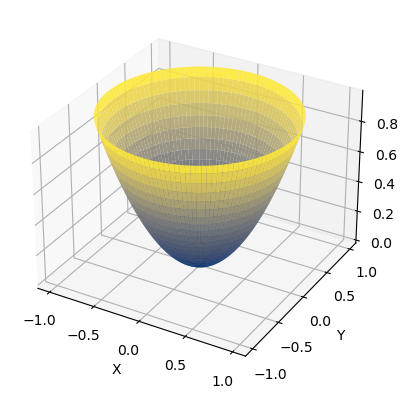

**Problem 1. Solution 1**

In [2]:
# THE GENERAL FRAMEWORK
rho, the = sp.symbols(r'\rho \theta',pos=True, real=True)   # r' -> \rho and \theta are single charavters
x, y, z, G = sp.symbols('x y z G', cls=sp.Function, real=True)
x = x(rho, the)                                  # Parameterization (u = rho, v = the)
y = y(rho, the)
z = z(rho, the)
G = G(x,y,z)                                     # Surface density (scalar function)
r = sp.Matrix([x, y, z])                         # Position vector in matrix form
r                                                # Position vector parameterized by rho and theta
#G                                               # 𝐺(𝑥(𝜌,𝜃),𝑦(𝜌,𝜃),𝑧(𝜌,𝜃))

Matrix([
[x(\rho, \theta)],
[y(\rho, \theta)],
[z(\rho, \theta)]])

In [3]:
integrand = G*sp.diff(r,rho).cross(sp.diff(r,the)).norm()     
integrand                                        # General form

sqrt(Abs(Derivative(x(\rho, \theta), \rho)*Derivative(y(\rho, \theta), \theta) - Derivative(x(\rho, \theta), \theta)*Derivative(y(\rho, \theta), \rho))**2 + Abs(Derivative(x(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) - Derivative(x(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))**2 + Abs(Derivative(y(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) - Derivative(y(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))**2)*G(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta))

In [4]:
# THE TASK SPECIFIC PART
# The integrand above is substituted by the specifics of the problem: Scalar function G(x,y,z).. 
# and the parameterized position vector to the points of the paraboloid surface.
integrand1 = integrand.subs([(G, x**2+y**2),
                             (x, rho*sp.cos(the)),
                             (y, rho*sp.sin(the)),
                             (z, rho**2)]).doit().simplify()
integrand1

\rho**2*sqrt(4*\rho**2 + 1)*Abs(\rho)

In [5]:
sp.integrate(integrand1, (the, 0, 2*sp.pi), (rho, 0, 1)).simplify()    # SymPy double integration  

pi*(1 + 25*sqrt(5))/60

=======================

**Problem 1. Solution 2** with SymPy's ParametricRegion()


In [6]:
from sympy import sin, cos, exp, pi, symbols
from sympy.vector import CoordSys3D, ParametricRegion, ImplicitRegion, vector_integrate
from sympy.abc import r, x, y, z, theta, phi
C = CoordSys3D('C')

In [7]:
# Area definition: Tuple of length 3 to define base scalars x,y,z in terms of parameters and
# then the lower and upper bounds of these parameters.
semiparaboloid = ParametricRegion((r*cos(theta), r*sin(theta), r**2),\
                                  (r, 0, 1), (theta, 0, 2*pi)  )


G = C.x**2 + C.y**2                  # Scalar field

I = vector_integrate(G, semiparaboloid).simplify()
I


pi*(1 + 25*sqrt(5))/60

===============================================================================================

### B. Vector field, Flux ###

The **surface integral of a vector function $\vec{G}(\vec{r})$**  is given by
 $$  \iint_S \vec{G} \cdot \vec{dS}  = \iint_S \vec{G} \cdot \vec{n } dS =  
\iint_S \vec{G}(\vec{r}(u,v)) \cdot \left(\frac{d\vec{r}}{du} \times \frac{d\vec{r}} {dv}\right) du dv,$$
 
This is also know as the **flux** of the vector field $\vec{G}$ across the surface *S*

===============================================================================================



**Problem 2.**  3D parabola: $\vec{r}(x,y) = \left<x, y, x^2+y^2 \right>$ and thus $\vec{r}(\rho, \theta) = \left<\rho\cos\theta, \rho\sin\theta, \rho^2\right>.$
 Suppose a vector field is given by $\vec{G}(x,y,z)=\left<y^2, z, 0 \right>.$
 Find the flux of $\vec{G}$  across half the surface for $0<\rho<1$  and $0<\theta<\pi$. [Youtube: Mr.PSolver]
 
 The paraboloid is the same as in the previous problem. Here is an outline of the vector field $\vec{G}$:
 

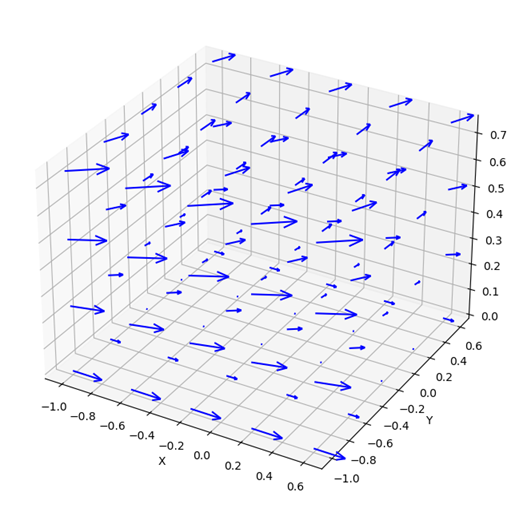

**Prbl 2 solution 1: In matrix form** using the formula $$Flux = \iint_S \vec{G}(\vec{r}(u,v)) \cdot \left(\frac{d\vec{r}}{du} \times \frac{d\vec{r}} {dv}\right) du dv. $$

Here $u = \theta $  and  $v = \rho.$

In [8]:
# THE GENERAL FRAMEWORK
rho, the = sp.symbols(r'\rho \theta',pos=True, real=True)         # r' ->  \rho is one symbol
x, y, z, G1, G2, G3 = sp.symbols('x y z G_1, G_2, G_3', cls=sp.Function, real=True)
x = x(rho, the)                                                   # Parameterization (u = rho, v = the)
y = y(rho, the)
z = z(rho, the)
G1 = G1(x,y,z)                                                 # Components of the vectorfield  G
G2 = G2(x,y,z)
G3 = G3(x,y,z)
r = sp.Matrix([x, y, z])                                       # Position vector r = <x,y,z>
G = sp.Matrix([G1, G2, G3])                                    # Vectorfield G = <G1,G2,G3>
G
#r

Matrix([
[G_1(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta))],
[G_2(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta))],
[G_3(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta))]])

In [9]:
integrand = G.dot(sp.diff(r,rho).cross(sp.diff(r,the)))       # From flux definition
integrand                                                     # General form of the integrable without function definitions.

(Derivative(x(\rho, \theta), \rho)*Derivative(y(\rho, \theta), \theta) - Derivative(x(\rho, \theta), \theta)*Derivative(y(\rho, \theta), \rho))*G_3(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta)) + (-Derivative(x(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) + Derivative(x(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))*G_2(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta)) + (Derivative(y(\rho, \theta), \rho)*Derivative(z(\rho, \theta), \theta) - Derivative(y(\rho, \theta), \theta)*Derivative(z(\rho, \theta), \rho))*G_1(x(\rho, \theta), y(\rho, \theta), z(\rho, \theta))

In [10]:
# THE TASK SPECIFIC PART
# The integrand above is substituted by the specifics of the problem.
# G = (G1, G2, G3) defines the vectorfield and x,y,z the surface (without the limits):
integrand1 = integrand.subs([(G1, y**2),
                             (G2, z),
                             (G3, 0),
                             (x, rho*sp.cos(the)),
                             (y, rho*sp.sin(the)),
                             (z, rho**2)]).doit().simplify()
integrand1

-2*\rho**4*(sin(2*\theta)/2 + 1)*sin(\theta)

In [11]:
sp.integrate(integrand1, (the, 0, sp.pi), (rho, 0, 1))        # SymPy integration

-4/5

================================================================================================

**Prbl 2 solution 2: Using SymPy ParametricRegion method.** Short and easy, but doesn't show much of the underlying math.

In [12]:
from sympy import sin, cos, exp, pi, symbols
from sympy.vector import CoordSys3D, ParametricRegion, ImplicitRegion, vector_integrate
from sympy.abc import r, x, y, z, theta, phi
C = CoordSys3D('C')

In [13]:
# Area definition: Tuple of length 3 to define base scalars x,y,z in terms of parameters and
# then the lower and upper bounds of these parameters.
semiparaboloid = ParametricRegion((r*cos(theta), r*sin(theta), r**2),\
                                  (r, 0, 1), (theta, 0, pi) )

# Vector field in vector form with parameters theta and r
f = r**2*sin(theta)*sin(theta)*C.i + r**2*C.j + 0*C.k

flux = vector_integrate(f, semiparaboloid)
flux
#f

-4/5

===============================================================================================

**Problem 3.** Evaluate the **flux**  $\iint_S \vec{A} \cdot \vec{n } dS$, where
 $\vec{A} =  z\vec{i} + x\vec{j} -3y^2z\vec{k}$ and *S* is the surface of the cylinder $x^2 + y^2 = 16$ includet in the first octant between *z=0* and *z=5*. [Sch96/20]
 
 **Solution 1:  in Cartesian coordinates.** The surface is projected on the *xz* plane and we call that projection *R*. We calculate the flux integral
 $$\iint_S \vec{A} \cdot \vec{n } dS.$$ 
It can be shown that  
 $$ dS  =  \frac{dxdz}{|\vec{n} \cdot \vec{j}|} $$ 
 and so 
 
 $$\iint_S \vec{A} \cdot \vec{n } dS  = \iint_R \vec{A} \cdot \vec{n } \frac{dxdz}{|\vec{n} \cdot \vec{j}|} $$
               
 

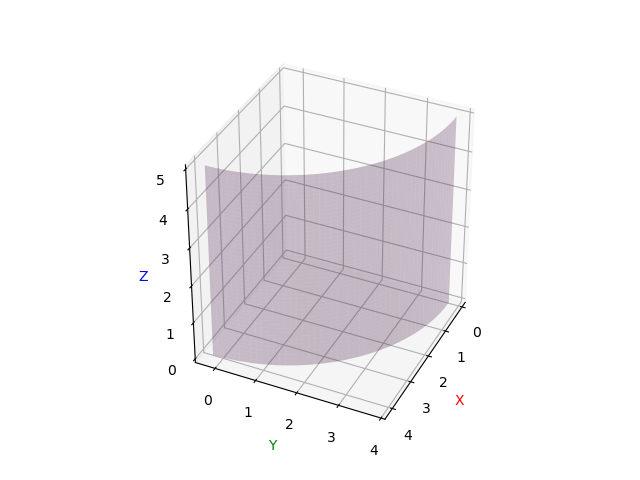

In [14]:
from sympy.vector import CoordSys3D, gradient
from sympy import *
x, y, z = symbols('x y z', pos=True, real=True)

A = C.z*C.i + C.x*C.j - 3*y**2*C.z*C.k                           # Vectorfield
S = C.x**2 + C.y**2 -16                                          # Surface x^2 + y^2 = 16

n = gradient(S).normalize()                                      # Unit normal to the surface
n

(2*C.x/sqrt(4*C.x**2 + 4*C.y**2))*C.i + (2*C.y/sqrt(4*C.x**2 + 4*C.y**2))*C.j

In [15]:
A_dot_n = A.dot(n).simplify()                                    # Inner product of A and n
A_dot_n

C.x*(C.y + C.z)/sqrt(C.x**2 + C.y**2)

In [16]:
nj = n.dot(C.j)                                                                       
print('Note that in the first octant y ≧ 0 and so nj ≧ 0  (below), and so  |n*j| = nj' )
nj

Note that in the first octant y ≧ 0 and so nj ≧ 0  (below), and so  |n*j| = nj


2*C.y/sqrt(4*C.x**2 + 4*C.y**2)

In [17]:
integrand = A_dot_n/nj
integrand = integrand.subs([(C.y, sp.sqrt(16-C.x**2))]).simplify()            # y solved from surface equation
integrand

C.x*C.z/sqrt(16 - C.x**2) + C.x

In [18]:
Flux = integrate(integrand, (C.x, 0, 4), (C.z, 0, 5))                         # Sympy dbl.integration (inner first i.e. x)
print('The flux is')
Flux

The flux is


90

===================

**Prbl 3. Solution 2.  In cylindrical coordinates, matrix form** 

In cylindrical coordinates $(\rho, \phi, z)$ we calculate the flux from the integral
$$\iint_S \vec{A} \cdot \vec{n } dS =\iint_S A(\vec{r}(u,v)) \cdot (\frac{d\vec{r}}{du} \times \frac{d\vec{r}}{dv})  du dv. $$ 
 
 The vector field was $\vec{A} =  z\vec{i} + x\vec{j} -3y^2z\vec{k}$, the surface *S*  the part of  the cylinder, where $\phi$ goes from *0* to $\pi /2$ and *z* from *0* to *5*.
Because the radius of the cylinder $x^2 + y^2 = 16$,   $\rho = 4$ is a constant, there are only two variables for the surface *S*: $u = \phi$ and $v = z$.   

In [19]:
# THE GENERAL FRAMEWORK
rho, phi, z = sp.symbols(r'\rho \phi z', pos=True, real=True)                          # Symbols
x, y, A, A1, A2, A3 = sp.symbols('x y A A_1, A_2, A_3', cls=sp.Function, real=True)    # Functions

# Cartesian coordinates parameterized
x = x(rho, phi)             
y = y(rho, phi)
# Vektor field components
A1 = A1(x,y,z)              
A2 = A2(x,y,z)
A3 = A3(x,y,z)
# Position vector in cylindrical coordin.
r = sp.Matrix([rho*sp.cos(phi), rho*sp.sin(phi), z])   
r

Matrix([
[\rho*cos(\phi)],
[\rho*sin(\phi)],
[             z]])

In [20]:
A = sp.Matrix([A1, A2, A3])                                 # Vector field
A

Matrix([
[A_1(x(\rho, \phi), y(\rho, \phi), z)],
[A_2(x(\rho, \phi), y(\rho, \phi), z)],
[A_3(x(\rho, \phi), y(\rho, \phi), z)]])

In [21]:
r_phi = sp.diff(r,phi)                                     # dr/dϕ
r_phi

Matrix([
[-\rho*sin(\phi)],
[ \rho*cos(\phi)],
[              0]])

In [22]:
r_z = sp.diff(r,z)                                         # dr/dz
r_z

Matrix([
[0],
[0],
[1]])

In [23]:
cross = r_phi.cross(r_z)                                   # (dr/dϕ)x(dr/dz)
cross

Matrix([
[\rho*cos(\phi)],
[\rho*sin(\phi)],
[             0]])

In [24]:
# THE TASK SPECIFIC PART
A = A.subs([(A1, z), (A2, x), (A3, -3*y**2*z),
            (x, rho*sp.cos(phi)), (y, rho*sp.sin(phi))   
           ]).doit()

A

Matrix([
[                        z],
[           \rho*cos(\phi)],
[-3*\rho**2*z*sin(\phi)**2]])

In [25]:
integrand1 = A.dot(cross)
integrand1

flx = sp.integrate(integrand1, (phi, 0, sp.pi/2), (z, 0, 5))
flx

5*\rho**2/2 + 25*\rho/2

In [26]:
flx = flx.subs([(rho, 4)])                                # rho gets its value 4
print('The flux is')
flx

The flux is


90

===============

**Same flux as above, but in two code blocks** (field A -> F):

In [27]:
# GENERAL FRAMEWORK 
rho, the, h = sp.symbols(r'\rho \theta h' ,pos=True, real=True)
x, y, z, F1, F2, F3 = sp.symbols('x y z  F_1, F_2, F_3', cls=sp.Function, real=True)

# Define the variables for Cartesian coordinate transformations 
x = x(rho, the)
y = y(rho, the)
z = z(h)

# F1,F2,F3 are the vectorfield components (functions represented in standard coordinates):
F1 = F1(x,y,z)
F2 = F2(x,y,z)
F3 = F3(x,y,z)

# Vectors are represented and calculated in SymPy Matrix form:
F = sp.Matrix([F1, F2, F3])
r = sp.Matrix([x, y, z])

integrand = F.dot(sp.diff(r,the).cross(sp.diff(r,h)))     #  F*(dr/dϕ)x(dr/dh) (* = dot product)
integrand                         # General form of the integrable without function definitions

F_1(x(\rho, \theta), y(\rho, \theta), z(h))*Derivative(y(\rho, \theta), \theta)*Derivative(z(h), h) - F_2(x(\rho, \theta), y(\rho, \theta), z(h))*Derivative(x(\rho, \theta), \theta)*Derivative(z(h), h)

In [28]:
# TASK SPECIFIC PART
# The integrand above is substituted by the values of the problem (vectorfield and coordinate..
# transformations)
integrand1 = integrand.subs([(F1, z),
                             (F2, x),
                             (F3, -3*y**2*z),
                             (x, rho*sp.cos(the)), 
                             (y, rho*sp.sin(the)),
                             (z, h)]).doit().simplify()

flux = sp.integrate(integrand1, (the, 0, sp.pi/2), (h, 0, 5))          # Integration with limits
flux = flux.subs([(rho, 4)])                                           # rho gets its value 4
print('The flux is', flux)

The flux is 90


=======================


**Prbl 3 solution 3: Using ParametricRegion.** 

Here is the problem 3 again: 

Evaluate the flux  $\iint_S \vec{A} \cdot \vec{n } dS$, where
 $\vec{A} =  z\vec{i} + x\vec{j} -3y^2z\vec{k}$ and *S* is the surface of the **cylinder** $x^2 + y^2 = 16$ includet in the first octant between *z=0* and *z=5*.

In [29]:
from sympy import sin, cos, exp, pi, symbols
from sympy.vector import CoordSys3D, ParametricRegion, ImplicitRegion, vector_integrate, ParametricIntegral
from sympy.abc import r, x, y, z, theta, phi
C = CoordSys3D('C')

In [30]:
# Area definition: Tuple of length 3 to define base scalars x,y,z in terms of parameters and
# then the lower and upper bounds of these parameters.
cyl = ParametricRegion((4*cos(theta), 4*sin(theta), z),
                        (theta, 0, pi/2), (z, 0, 5))                   # 4 is the radius of the cylinder

# Vector field A in vector form with parameters theta and z
A = z*C.i + 4*cos(theta)*C.j - 3*4**2*sin(theta)*sin(theta)*z*C.k

flux = vector_integrate(A, cyl)
# flux = ParametricIntegral(A, cyl)        # Alternatively
flux


90

=============================================================================================

**Problem 4.** Compute the flux $ \iint_S \vec{F} \cdot \vec{dS} $ of the vectorfield $ \vec{F} = x\vec{i} + y\vec{i} + z^2\vec{k} $ through the  surface *S*, which is the upper half of the sphere 
$x^2 + y^2 + z^2 = 9.$ 

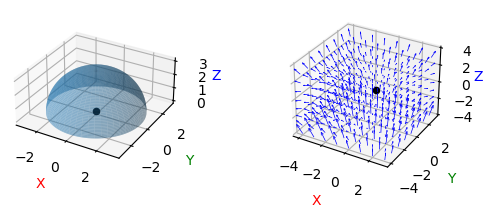

In [31]:
# PICTURES of 1/2-SPHERE and VECTOR FIELD
fig = plt.figure()

# 1/2-SPHERE
# Figure 
ax = fig.add_subplot(2, 2, 1, projection='3d') # height, width, plot number. So, a 221 means 2 tall, 2 wide, plot number 1.
#plt.rcParams["figure.figsize"] = (10,10)
ax.set_xlabel("X", color='r')
ax.set_ylabel("Y", color='g')
ax.set_zlabel("Z", color='b')
ax.zaxis.labelpad=-3.5                         # To make Z fit into the picture

# Surface
# Spherical coordinates: The R(adius) is constant, P(hi) and T(heta) are variables 
R = 3                                                     
P = np.linspace(0, 2 * np.pi, 100)             # Phi
T = np.linspace(0, np.pi/2, 100)               # Theta
# Transform to XYZ coordinates:
X = 3 * np.outer(np.cos(P), np.sin(T))
Y = 3 * np.outer(np.sin(P), np.sin(T))
Z = 3 * np.outer(np.ones(np.size(P)), np.cos(T))

# Plot the surface:
ax.plot_surface(X, Y, Z, alpha=0.5)
ax.set_aspect('equal')

# Black point in the origin
ax.scatter(0, 0, 0, color='k')

# VECTOR FIELD
# Figure
ax = fig.add_subplot(2, 2, 2, projection='3d')
#plt.rcParams["figure.figsize"] = (10,10)
ax.set_zlim(-4,4)
ax.set_xlabel("X", color='r')
ax.set_ylabel("Y", color='g')
ax.set_zlabel("Z", color='b')
ax.zaxis.labelpad=-3.5                        # To make Z fit into the picture

# Vector field
# Make the grid:
x, y, z = np.meshgrid(np.arange(-4, 4, 1),
                      np.arange(-4, 4, 1),
                      np.arange(-4, 4, 1))
# Make the direction data for the arrows:
s = 4                                         # Scaling divisor
u = x/s
v = y/s
w = z**2/s                                    # The field strength increases strongly in the direction of +Z when |z| grows.
# Plot the vector field:
ax.quiver(x, y, z, u, v, w, color='b',length=0.3, normalize=False, linewidth=0.5)          

# Black point in the origin:
ax.scatter(0, 0, 0, color='k')

# SHOW both pictures
plt.show()

**Prbl 4 solution 1 in spherical coordinates.**   We use the spherical coordinates $(\rho, \theta, \phi)$ and calculate the flux from the integral
$$ \iint_S \vec{F} \cdot \vec{dS} = \iint_S \vec{F} \cdot \vec{n } dS =\iint_S F(\vec{r}(u,v)) \cdot (\frac{d\vec{r}}{du} \times \frac{d\vec{r}}{dv})  du dv, $$ 
 where $\rho = 3$ , $u = \theta$ and $ v = \phi.$ 

In [32]:
# THE GENERAL FRAMEWORK 
rho, the, phi = sp.symbols(r'\rho \theta \phi' ,pos=True, real=True)
x, y, z, F1, F2, F3 = sp.symbols('x y z  F_1, F_2, F_3', cls=sp.Function, real=True)

# Define the variables for transformations from Cartesian coordinates to spheherical coordinates
x = x(rho, the, phi)
y = y(rho, the, phi)
z = z(rho, the)

# F1,F2,F3 are the vectorfield components (functions represented in standard coordinates):
F1 = F1(x,y,z)
F2 = F2(x,y,z)
F3 = F3(x,y,z)

# Vectors are represented and calculated in SymPy matrix form:
F = sp.Matrix([F1, F2, F3])                             # Vector field
r = sp.Matrix([x, y, z])                                # Position vector

# Calculate the integrand (the general form without function definitions):
integrand = F.dot(sp.diff(r,the).cross(sp.diff(r,phi)))     # F*(dr/d𝜃)x(dr/d𝜙) (* = dot product)
integrand                        

(-Derivative(x(\rho, \theta, \phi), \phi)*Derivative(y(\rho, \theta, \phi), \theta) + Derivative(x(\rho, \theta, \phi), \theta)*Derivative(y(\rho, \theta, \phi), \phi))*F_3(x(\rho, \theta, \phi), y(\rho, \theta, \phi), z(\rho, \theta)) - F_1(x(\rho, \theta, \phi), y(\rho, \theta, \phi), z(\rho, \theta))*Derivative(y(\rho, \theta, \phi), \phi)*Derivative(z(\rho, \theta), \theta) + F_2(x(\rho, \theta, \phi), y(\rho, \theta, \phi), z(\rho, \theta))*Derivative(x(\rho, \theta, \phi), \phi)*Derivative(z(\rho, \theta), \theta)

In [33]:
# TASK SPECIFIC PART
# The integrand above is substituted by the values of the problem (vectorfield and coordinate..
# transformations)
integrand1 = integrand.subs([(F1, x),
                             (F2, y),
                             (F3, z**2),
                             (x, 3*sp.sin(the)*sp.cos(phi)),
                             (y, 3*sp.sin(the)*sp.sin(phi)),
                             (z, 3*sp.cos(the))]).doit().simplify()

flux = sp.integrate(integrand1, (the, 0, sp.pi/2), (phi, 0, 2*sp.pi) )  # Integration with limits

# OUTPUT
print('The flux is')
flux

The flux is


153*pi/2

**Prbl 4 solution 2 using ParametricRegion**

In [34]:
from sympy import sin, cos, exp, pi, symbols
from sympy.vector import CoordSys3D, ParametricRegion, ImplicitRegion, vector_integrate
from sympy.abc import a, r, x, y, z, theta, phi
C = CoordSys3D('C')

In [35]:
# Area definition: Tuple of length 3 to define base scalars x,y,z in terms of parameters and
# then the lower and upper bounds of these parameters.
semisphere = ParametricRegion((3*sin(theta)*cos(phi), 3*sin(theta)*sin(phi), 3*cos(theta)),\
                             (theta, 0, pi/2), (phi, 0, 2*pi))

#B = x*C.i + y*C.j + z**2*C.k       # Vectorfield
A = 3*sin(theta)*cos(phi)*C.i  + 3*sin(theta)*sin(phi)*C.j + (3*cos(theta))**2*C.k  # Vectorfield
flux = vector_integrate(A, semisphere)

#print(semisphere.dimensions)
print('The flux is')
flux


The flux is


153*pi/2

===============================================================================================

**Problem 5.** Consider a region of space in which there is a constant vectorfield $E(x, y, z) = a\mathbf{\hat{k}}$. A hemisphere of radius r lies on the x-y plane. What is the flux of the field through the sphere?  [SymPy 1.12 doc]

**Solution** using ParametricRegion

In [36]:
from sympy import sin, cos, exp, pi, symbols
from sympy.vector import CoordSys3D, ParametricRegion, ImplicitRegion, vector_integrate
from sympy.abc import a, r, x, y, z, theta, phi
C = CoordSys3D('C')

In [37]:
semisphere = ParametricRegion((r*sin(theta)*cos(phi), r*sin(theta)*sin(phi), r*cos(theta)),\
                            (theta, 0, pi/2), (phi, 0, 2*pi))
flux = vector_integrate(a*C.k, semisphere)
#print(semisphere.limits)
#print(semisphere.dimensions)
print('The flux is')
flux


The flux is


pi*a*r**2

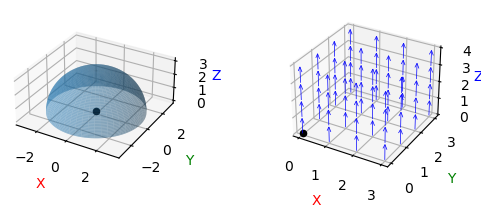

In [38]:
# PICTURES of 1/2-SPHERE and VECTOR FIELD
fig = plt.figure()

# 1/2-SPHERE
# Figure 
ax = fig.add_subplot(2, 2, 1, projection='3d') # height, width, plot number. So, a 221 means 2 tall, 2 wide, plot number 1.
#plt.rcParams["figure.figsize"] = (10,10)
ax.set_xlabel("X", color='r')
ax.set_ylabel("Y", color='g')
ax.set_zlabel("Z", color='b')
ax.zaxis.labelpad=-3.5                         # To make Z fit into the picture

# Surface
# Spherical coordinates: The R(adius) is constant, P(hi) and T(heta) are variables 
R = 3                                                     
P = np.linspace(0, 2 * np.pi, 100)             # Phi
T = np.linspace(0, np.pi/2, 100)               # Theta
# Transform to XYZ coordinates:
X = 3 * np.outer(np.cos(P), np.sin(T))
Y = 3 * np.outer(np.sin(P), np.sin(T))
Z = 3 * np.outer(np.ones(np.size(P)), np.cos(T))

# Plot the surface:
ax.plot_surface(X, Y, Z, alpha=0.5)
ax.set_aspect('equal')

# Black point in the origin
ax.scatter(0, 0, 0, color='k')

# VECTOR FIELD
# Figure
ax = fig.add_subplot(2, 2, 2, projection='3d')
#plt.rcParams["figure.figsize"] = (10,10)
ax.set_zlim(0,4)
ax.set_xlabel("X", color='r')
ax.set_ylabel("Y", color='g')
ax.set_zlabel("Z", color='b')
ax.zaxis.labelpad=-3.5                        # To make Z fit into the picture

# Vector field
# Make the grid:
x, y, z = np.meshgrid(np.arange(0, 4, 1),
                      np.arange(0, 4, 1),
                      np.arange(0, 4, 1))
# Make the direction data for the arrows,
# constant field in +Z direction:                                         
u = 0
v = 0
w = 3                                         # The field strength increases strongly in the direction of +Z when |z| grows.
# Plot the vector field:
ax.quiver(x, y, z, u, v, w, color='b',length=0.3, normalize=False, linewidth=0.5)          

# Black point in the origin:
ax.scatter(0, 0, 0, color='k')

# SHOW both pictures
plt.show()

===============================================================================================


**Problem 6.** Consider a region of space in which there is a vector field $E(x, y, z) = x^2 \mathbf{\hat{k}}$
 above the x-y plane, and a field $E(x, y, z) = y^2 \mathbf{\hat{k}}$
 below the x-y plane. What is the flux of that vector field through a cube of side length L with its center at the origin?  [SymPy 1.12 doc]

**Solution** using ParametricRegion. The field is parallel to the z-axis so only the top and bottom face of the box will contribute to flux.


In [39]:
x, y, z = sp.symbols('x y z')
x, y, z, c1, c2, c3, t, p = sp.symbols('x y z c1 c2, c3 t  p')
L = symbols('L', positive=True)
# See 'Parametric region' below; ParametricRegion((parameters), (x bounds),(y bounds)):
top_face = ParametricRegion((x, y, L/2), (x, -L/2, L/2), (y, -L/2, L/2))
bottom_face = ParametricRegion((x, y, -L/2), (x, -L/2, L/2), (y, -L/2, L/2))
flux = vector_integrate(C.x**2*C.k, top_face) + vector_integrate(C.y**2*C.k, bottom_face)
print('The flux is')
flux

The flux is


L**4/6

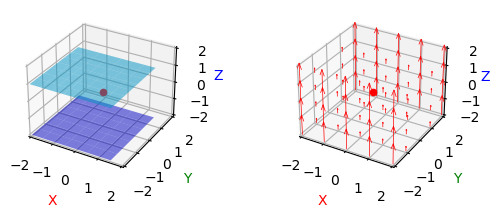

In [40]:
# Pictures to Problem 6
# TWO HORIZONTAL PLANES
# Figure
fig = plt.figure()
ax = fig.add_subplot(2,2,1,projection='3d')                          #  "111" means "1x1 grid, first subplot"..                                              # ("234" means "2x3 grid,  4th  subplot").
ax.set_xlabel("X", color='r')
ax.set_ylabel("Y", color='g')
ax.set_zlabel("Z", color='b')
ax.zaxis.labelpad=-1.5                                               # To make Z visible
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_zlim(-2,2)

# Plane1
h1 = -2
X1, Y1 = np.meshgrid(np.arange(-2, 2, 0.5), np.arange(-2, 2, 0.5))                          
Z1 = np.ones_like(X1)*h1                                             # z=h1 in every grid point: 10x10 array of number h1 
# Plot 
ax.plot_surface(X1, Y1, Z1, color='b', alpha=0.5)                    # alpha -> degree of opacity

# Plane2
h2 = 1
X2, Y2 = np.meshgrid(np.arange(-2, 2, 0.5), np.arange(-2, 2, 0.5))
Z2 = np.ones_like(X2)*h2                                             # z=h1 in every grid point: 10x10 array of number h1 
# Plot 
ax.plot_surface(X2, Y2, Z2, color='deepskyblue', alpha=0.5)          # alpha -> degree of opacity

#------------------------------------------------
# POINT in the origin
ax.scatter(0, 0, 0, color='r')
#------------------------------------------------

# VECTOR FIELD
# Figure
ax = fig.add_subplot(2, 2, 2, projection='3d')
plt.rcParams["figure.figsize"] = (10,10)

ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_zlim(-2,2)
ax.set_xlabel("X", color='r')
ax.set_ylabel("Y", color='g')
ax.set_zlabel("Z", color='b')
ax.zaxis.labelpad=-3.5                                               # To make Z fit into the picture

# Vector field
# Make the grid:
x, y, z = np.meshgrid(np.arange(-2, 2.2, 1),
                      np.arange(-2, 2.2, 1),
                      np.arange(-2, 2, 1))

# Make the direction data for the arrows (constant field in +Z direction):                                        
u = 0
v = 0
w = y**2                                
# Plot the vector field:
ax.quiver(x, y, z, u, v, w, color='r',length=0.3, normalize=False, linewidth=0.5)          

#-------------------------------------------------
# Point in the origin:
ax.scatter(0, 0, 0, color='r')
#-----------------------------------------------
# SHOW both pictures
plt.show()

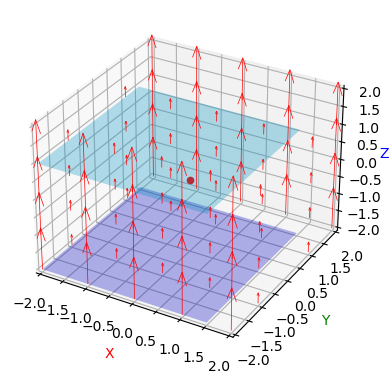

In [41]:
# Picture to Problem 6 (field and surfaces in the same picture)

# TWO HORIZONTAL PLANES
# Figure
fig = plt.figure()
ax = fig.add_subplot(2,2,1,projection='3d')                          #  "111" means "1x1 grid, first subplot"..                                              # ("234" means "2x3 grid,  4th  subplot").
ax.set_xlabel("X", color='r')
ax.set_ylabel("Y", color='g')
ax.set_zlabel("Z", color='b')
ax.zaxis.labelpad=-1.5                                               # To make Z visible
ax.set_xlim(-2,2)
ax.set_ylim(-2,2)
ax.set_zlim(-2,2)

# Plane1
h1 = -2
X1, Y1 = np.meshgrid(np.arange(-2, 2, 0.5), np.arange(-2, 2, 0.5))                          
Z1 = np.ones_like(X1)*h1                                             # z=h1 in every grid point: 10x10 array of number h1 
# Plot 
ax.plot_surface(X1, Y1, Z1, color='b', alpha=0.3)                    # alpha -> degree of opacity

# Plane2
h2 = 1
X2, Y2 = np.meshgrid(np.arange(-2, 2, 0.5), np.arange(-2, 2, 0.5))
Z2 = np.ones_like(X2)*h2                                             # z=h1 in every grid point: 10x10 array of number h1 
# Plot 
ax.plot_surface(X2, Y2, Z2, color='deepskyblue', alpha=0.3)          # alpha -> degree of opacity

# VECTOR FIELD
# Make the grid:
x, y, z = np.meshgrid(np.arange(-2, 2.2, 1),
                      np.arange(-2, 2.2, 1),
                      np.arange(-2, 2, 1))
# Make the direction data for the arrows (constant field in +Z direction):                                        
u = 0
v = 0
w = y**2                                 
# Plot the vector field:
ax.quiver(x, y, z, u, v, w, color='r',length=0.3, normalize=False, linewidth=0.5)          

#-------------------------------------------------
# Point in the origin:
ax.scatter(0, 0, 0, color='r')
#-----------------------------------------------
# SHOW both pictures
plt.show()

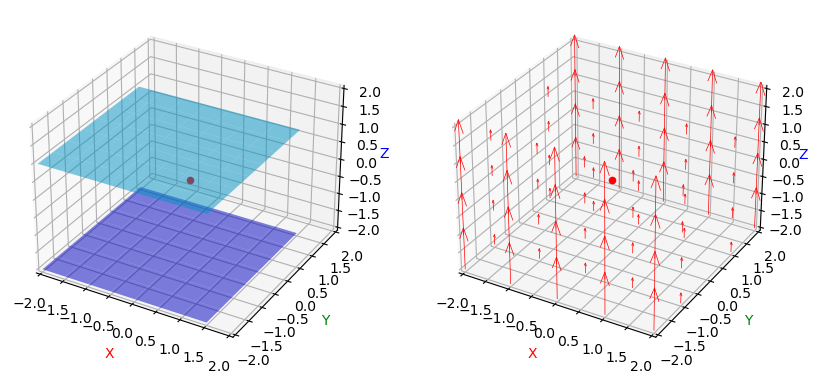

===============================================================================================


**Problem 6.** Vector field &nbsp; $ \vec{F}(x, y, z) = 4xz\mathbf{\hat{i}} - y^2\mathbf{\hat{i}} + yz\mathbf{\hat{k}}$. Evaluate $\iint_S \vec{F} \cdot \vec{n }$ *dS* &nbsp; where $S$ is the surface of the cube bounded by x=0, x=1, y=0, y=1, z=0, z=1. [Sch/s98/23]

**Solution.** The surface is the unit cube in the first quadrant. When calculating the flux outward from the cube, those faces where the origin is one vertex get normal -i, -j and -k (faces 2,4 and 6 respectively).
 

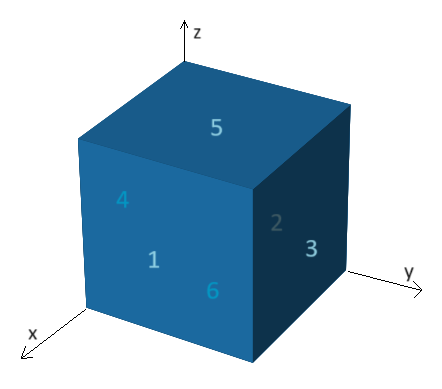

In [42]:
x, y, z = sp.symbols('x y z')

F = sp.Matrix([4*x*z, -y**2, y*z])

n = sp.Matrix([1,0,0])                     
Fn = F.dot(n).subs(x,1)
I1 = sp.integrate(Fn,  (y,0,1), (z,0,1))

n = sp.Matrix([-1,0,0])                                            # Normal of the yz-face (2) of the cube
Fn = F.dot(n).subs(x,0)                                            # F.n  is calculated and substituted by x=0 
I2 = sp.integrate(Fn,  (y,0,1), (z,0,1))                           # Flux through yz-face

n = sp.Matrix([0,1,0])
Fn = F.dot(n).subs(y,1)
I3 = sp.integrate(Fn,  (x,0,1), (z,0,1))

n = sp.Matrix([0,-1,0])
Fn = F.dot(n).subs(y,0)
I4 = sp.integrate(Fn,  (x,0,1), (z,0,1))

n = sp.Matrix([0,0,1])
Fn = F.dot(n).subs(z,1)
I5 = sp.integrate(Fn,  (x,0,1), (y,0,1))

n = sp.Matrix([0,0,-1])
Fn = F.dot(n).subs(z,0)
I6 = sp.integrate(Fn,  (x,0,1), (y,0,1))

print('The fluxes of the faces are', I1,I2,I3,I4,I5,I6)
print('The total flux out of the cube is',  I1+I2+I3+I4+I5+I6)

The fluxes of the faces are 2 0 -1 0 1/2 0
The total flux out of the cube is 3/2
